In [1]:
import tensorflow as tf 
from tensorflow import keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [158]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255.)

In [165]:
train_generator = train_datagen.flow_from_directory('C:/Users/HP PAVILION 15/Documents/Programming/Datasets/dogs-vs-cats/train',
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 20000 images belonging to 2 classes.


In [166]:
validation_generator = test_datagen.flow_from_directory('C:/Users/HP PAVILION 15/Documents/Programming/Datasets/dogs-vs-cats/Validation',
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 5000 images belonging to 2 classes.


In [167]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                   keras.layers.MaxPooling2D(2,2),
                                   keras.layers.Conv2D(32,(3,3),activation='relu'),
                                   keras.layers.MaxPooling2D(2,2),
                                   keras.layers.Flatten(),
                                   keras.layers.Dense(512,activation='relu'),
                                   keras.layers.Dense(1,activation='sigmoid')])

In [168]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               21234176  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [169]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [175]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 67s 674ms/step - loss: 0.6161 - acc: 0.6590 - val_loss: 0.5179 - val_acc: 0.7560
Epoch 2/100
100/100 [==============================] - 65s 650ms/step - loss: 0.6054 - acc: 0.6810 - val_loss: 0.5512 - val_acc: 0.7220
Epoch 3/100
100/100 [==============================] - 62s 625ms/step - loss: 0.6080 - acc: 0.6760 - val_loss: 0.6338 - val_acc: 0.7060
Epoch 4/100
100/100 [==============================] - 62s 621ms/step - loss: 0.5920 - acc: 0.6850 - val_loss: 0.5643 - val_acc: 0.7480
Epoch 5/100
100/100 [==============================] - 61s 608ms/step - loss: 0.5984 - acc: 0.6800 - val_loss: 0.5357 - val_acc: 0.7230
Epoch 6/100
100/100 [==============================] - 61s 614ms/step - loss: 0.5974 - acc: 0.6870 - val_loss: 0.5164 - val_acc: 0.7520
Epoch 7/100
100/100 [==============================] - 83s 825ms/step - loss: 0.6025 - acc: 0.6855 - val_loss: 0.5144 - val_acc: 0.7600
Epoch 8/100
100/100 [===========================

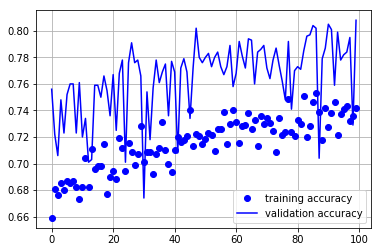

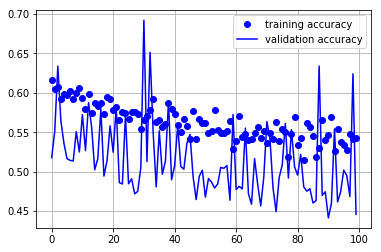

In [177]:
train_loss = history.history['loss']
train_acc = history.history['acc']
test_loss = history.history['val_loss']
test_acc = history.history['val_acc']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'bo',label='training accuracy')
plt.plot(epochs, test_acc, 'b', label='validation accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, train_loss, 'bo',label='training accuracy')
plt.plot(epochs, test_loss, 'b', label='validation accuracy')
plt.legend()
plt.grid()
plt.show()

In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [246]:
img = cv2.imread('C:/Users/HP PAVILION 15/Documents/Programming/Datasets/dogs-vs-cats/test1/1335.jpg')

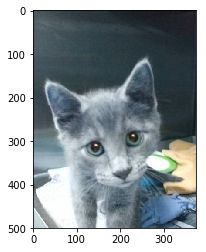

In [247]:
plt.imshow(img)

In [248]:
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

In [249]:
classes = model.predict(img, batch_size=10)

print(classes[0])

if classes[0]>0.5:
    print("it's a dog")
else:
    print("it's a cat")


[0.]
it's a cat
